In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
df=pd.read_csv("/kaggle/input/test-file/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.drop(columns=["PassengerId"],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# if null values is 50% or more we drop it 
df.drop(columns=['Cabin'],inplace=True)

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


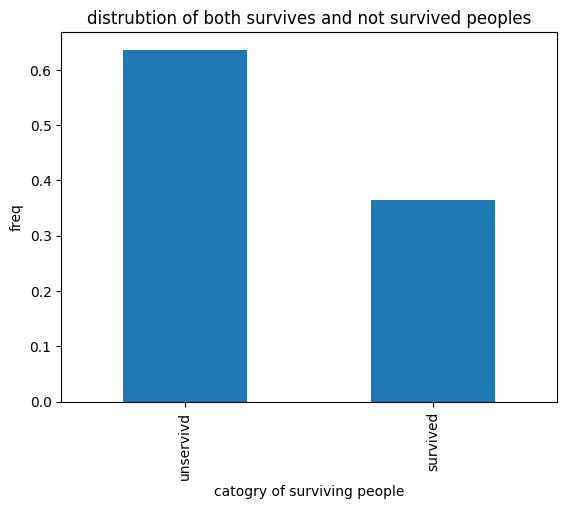

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
df['Survived'].value_counts(normalize=True).rename({0:'unservivd',1:'survived'}).plot(kind="bar")
plt.xlabel("catogry of surviving people")
plt.ylabel("freq")
plt.title("distrubtion of both survives and not survived peoples")
plt.show();

as we see most of people unsurvived from titanic about 60% or more  unsurvived 

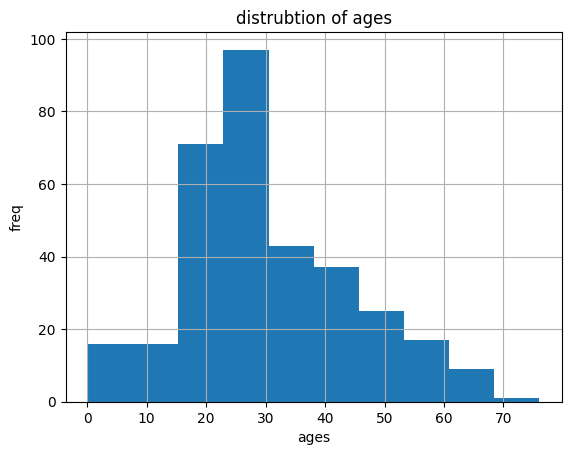

In [8]:
df['Age'].hist()
plt.xlabel("ages")
plt.ylabel("freq")
plt.title("distrubtion of ages")
plt.show()

as we see age is normal distrubtion so we can fillna of missing values in age with mean (avg) of age 
remark: if age was having outilers which is mean is senstive we would use median instead 

In [9]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       418 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


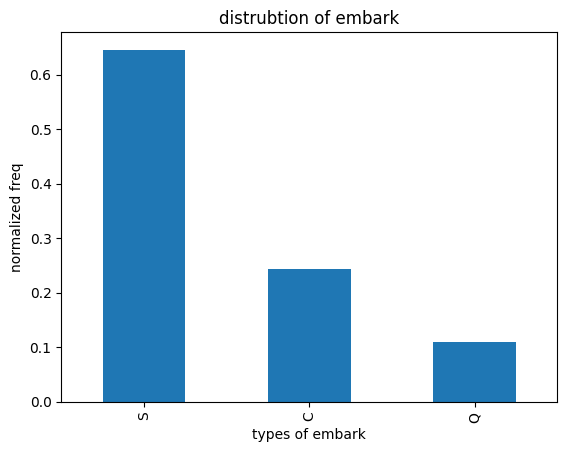

In [11]:
df['Embarked'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("types of embark")
plt.ylabel("normalized freq")
plt.title("distrubtion of embark")
plt.show()

as we see most types was s embark about 60% or more

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


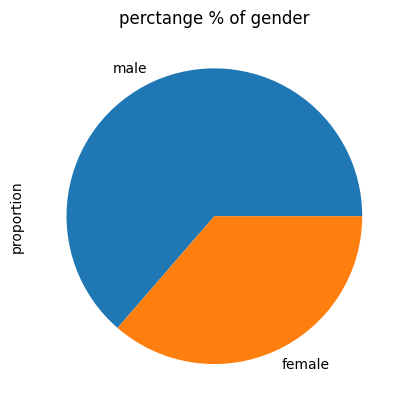

In [13]:
df['Sex'].value_counts(normalize=True).plot(kind="pie")
plt.title("perctange % of gender")
plt.show()

as we see most of gender is male 

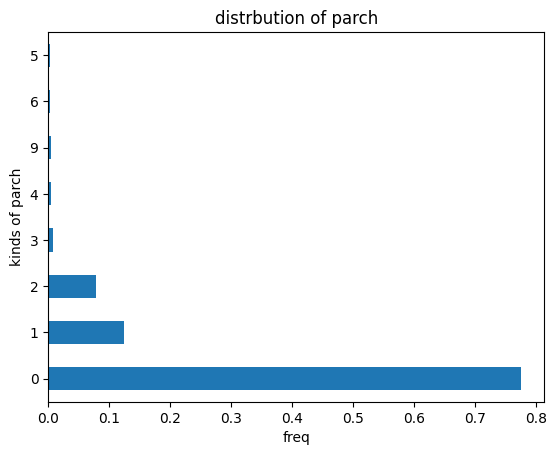

In [14]:
df['Parch'].value_counts(normalize=True).plot(kind="barh")
plt.title("distrbution of parch")
plt.xlabel("freq")
plt.ylabel("kinds of parch");

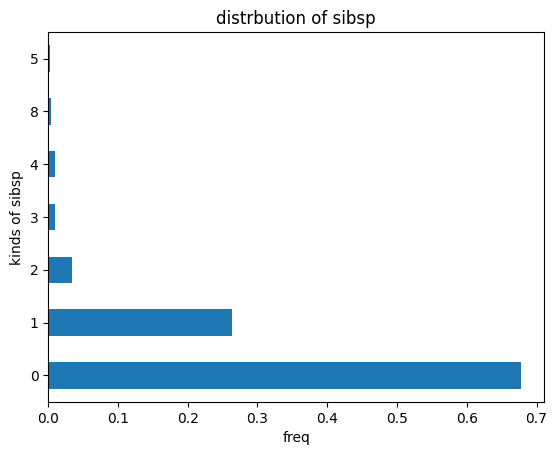

In [15]:
df['SibSp'].value_counts(normalize=True).plot(kind="barh")
plt.title("distrbution of sibsp")
plt.xlabel("freq")
plt.ylabel("kinds of sibsp");

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [17]:
df.groupby('Survived')['Fare'].mean()

Survived
0    27.527877
1    49.747699
Name: Fare, dtype: float64

In [18]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64

In [19]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [20]:
emb=pd.get_dummies(df['Embarked'])

In [21]:
emb=emb.astype(int)

In [22]:
sex=sex.astype(int)

In [23]:
df=pd.concat([df,sex,emb],axis=1)

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,0,1,0
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,0,1
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,0,1,0
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,0,1


In [25]:
df.drop(columns=['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [26]:
df.head()
df=df.rename({'male':'gender','C':'emb_c','Q':'emb_q','S':'emb_s'},axis=1)

In [27]:
df.dropna(inplace=True)

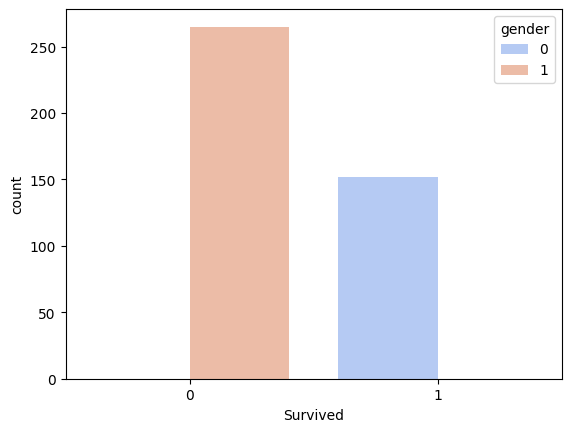

In [28]:
sns.countplot(x='Survived',data=df,hue='gender',palette='coolwarm');

In [29]:
df['Survived'].value_counts()

Survived
0    265
1    152
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print(y_pred)
print(y_test.values)

[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 1 1 0]
[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 0 1 1 0]


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[50,  0],
       [ 0, 34]])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

